# Moving Averages in Finance
The `Moving Average Crossover` strategy is a popular and simple method to identify potential buy and sell signals based on historical price data. A **Simple Moving Average (SMA)** is calculated by taking the arithmetic mean of a given set of values over a specified number of periods. Moving averages help smooth out price data to identify trends and potential buy/sell signals. The moving average crossover strategy involves two moving averages: a *short-term moving average* (such as SMA30) and a *long-term moving average* (such as SMA100). This strategy is based on the relationship between these two moving averages.
1. **Golden Cross**: A Golden Cross occurs when a short-term moving average (like SMA30) crosses above a long-term moving average (like SMA100). This is generally considered a bullish signal, indicating the potential for a strong upward trend. Traders may see this as a signal to buy.
2. **Death Cross**: A Death Cross occurs when a short-term moving average (like SMA30) crosses below a long-term moving average (like SMA100).This is generally considered a bearish signal, indicating the potential for a strong downward trend. Traders may see this as a signal to sell.

- **Advantages**:
    - Easy to understand and implement.
    - Helps identify the direction of the trend, allowing traders to make informed decisions.
- **Disadvantages**:
    - During sideways or choppy markets, moving average crossovers can produce false signals, leading to potential losses.
    - Moving averages are good at confirming that a trend (up or down) has been happening, but they don't tell you ahead of time what will happen next. 

In [1]:
# Loading necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Loading the dataset

df = pd.read_csv('C:/Users/sogor/OneDrive/Documents/DataScientist_practice/datasets/TSLA_stocks.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
print(f'This dataset contains Tesla stock prices from {df.index.min()} up to {df.index.max()}')

This dataset contains Tesla stock prices from 2010-06-29 00:00:00 up to 2022-03-24 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB


I have 2956 records and 6 features. Thankfully I don't have any missing value.

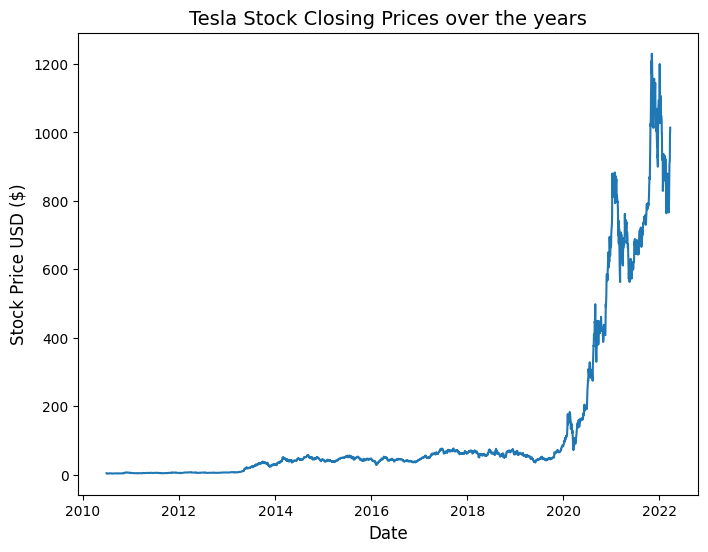

In [5]:
plt.figure(figsize=(8, 6))

plt.plot(df.index, df['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price USD ($)', fontsize=12)
plt.title('Tesla Stock Closing Prices over the years', fontsize=14)
plt.show() 

In [6]:
# Creating the moving averages for short and long term

SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = df['Adj Close'].rolling(window=30).mean()

SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = df['Adj Close'].rolling(window=100).mean()

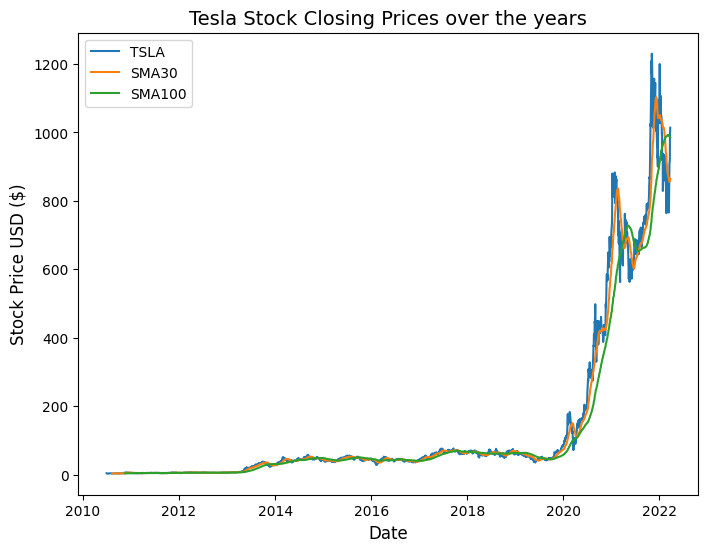

In [7]:
plt.figure(figsize=(8, 6))

plt.plot(df.index, df['Close'], label='TSLA')
plt.plot(df.index, SMA30['Adj Close Price'], label='SMA30')
plt.plot(df.index, SMA100['Adj Close Price'], label='SMA100')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price USD ($)', fontsize=12)
plt.title('Tesla Stock Closing Prices over the years', fontsize=14)
plt.legend(loc='upper left')
plt.show() 

In [8]:
# Create a new dataframe to store all the data

data = pd.DataFrame()
data['TSLA'] = df['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']

In [9]:
# Building a function which generates buy and sell signals based on the crossover strategy

def buy_sell_signal(data):
    signal_price_buy = []
    signal_price_sell = []
    flag = -1 # helps track the state of the crossover

    for i in range(len(data)):
        if data['SMA30'].iloc[i] > data['SMA100'].iloc[i]:
            if flag != 1: # indicating that the last signal was not a buy signal
                signal_price_buy.append(data['TSLA'].iloc[i])
                signal_price_sell.append(np.nan)
                flag = 1
            else: # it means we have already generated a buy signal previously, so no new signal is generated
                signal_price_buy.append(np.nan)
                signal_price_sell.append(np.nan)
        elif data['SMA30'].iloc[i] < data['SMA100'].iloc[i]:
            if flag != 0: # indicating that the last signal was not a sell signal
                signal_price_buy.append(np.nan)
                signal_price_sell.append(data['TSLA'].iloc[i])
                flag = 0
            else: # it means we have already generated a sell signal previously, so no new signal is generated
                signal_price_buy.append(np.nan)
                signal_price_sell.append(np.nan)
        else: # it indicates no crossover
            signal_price_buy.append(np.nan)
            signal_price_sell.append(np.nan)

    return (signal_price_buy, signal_price_sell)

In [10]:
# Storing the buy and sell prices 

data['Buy_Signal_Price'] = buy_sell_signal(data)[0]
data['Sell_Signal_Price'] = buy_sell_signal(data)[1]

In [11]:
data

,TSLA,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2010-06-29,4.778000,NaN,NaN,NaN,NaN
2010-06-30,4.766000,NaN,NaN,NaN,NaN
2010-07-01,4.392000,NaN,NaN,NaN,NaN
2010-07-02,3.840000,NaN,NaN,NaN,NaN
2010-07-06,3.222000,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-03-18,905.390015,856.655998,988.279197,NaN,NaN
2022-03-21,921.159973,856.583997,987.306497,NaN,NaN
2022-03-22,993.979980,859.471995,986.867697,NaN,NaN


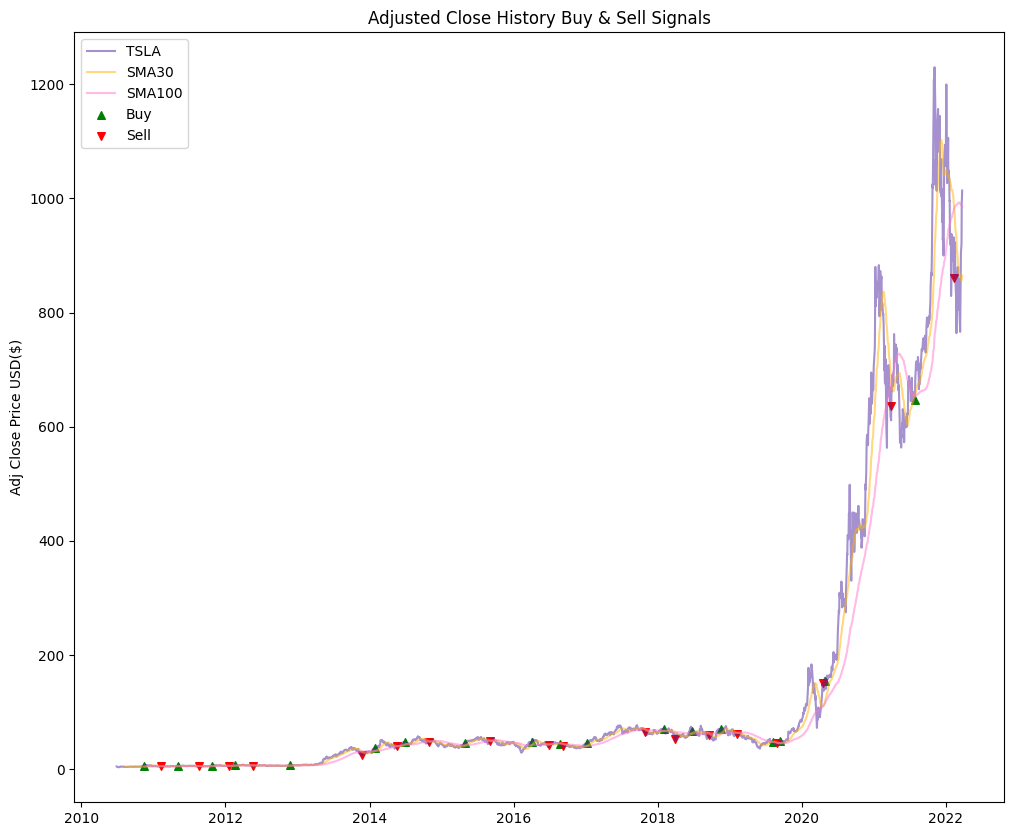

In [12]:
# Visualize the strategy 

plt.figure(figsize=(12, 10))
plt.plot(data['TSLA'], label='TSLA', color='#4A249D', alpha=0.5)
plt.plot(data['SMA30'], label='SMA30', color='#FFB200', alpha=0.5)
plt.plot(data['SMA100'], label='SMA100', color='#FF76CE', alpha=0.5)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green', s=30)
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red', s=30)
plt.title('Adjusted Close History Buy & Sell Signals')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper left') 
plt.show()

# Bollinger Bands & RSI in Finance
The `Relative Strength Index (RSI)` is a valuable tool for traders to identify potential buy and sell opportunities by assessing overbought and oversold condition in a stock or other assets. The RSI oscillates between 0 and 100.
1. **Overbought**: An asset is considered overbought when the RSI is above 70, indicating that it may be overvalued and a price correction could be forthcoming.
2. **Oversold**: An asset is considered oversold when the RSI is below 30, suggesting that it may be undervalued and a price increase could be expected.

- **Advantages**:
    - RSI helps traders identify potential reversal points by indicating when an asset might be overbought or oversold.
    - RSI can be used to spot divergences between the RSI and price movements, which can indicate potential reversals. For example, if the price is making new highs but the RSI is not, this could signal a weakening trend.
- **Disadvantages**:
    - RSI is based on past price data and therefore may lag behind actual price movements. This can lead to delayed signals.
    - The standard 30 and 70 thresholds may not be suitable for all assets or market conditions.
    

`Bollinger Bands` are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity. The bands expand and contract based on the volatility of the price. When the market is more volatile, the bands widen, and when the market is less volatile, the bands contract. They consist of three lines:
1. *Middle Band*: A simple moving average (SMA) of the price.
2. *Upper Band*: The middle band plus two standard deviations of the price.
3. *Lower Band*: The middle band minus two standard deviations of the price.


**The use of Bands:** When the price touches the upper band, the asset might be overbought and when the price touches the lower band, the asset might be oversold.

If the RSI indicates an overbought condition and the price touches the upper Bollinger Band, it strengthens the signal that the asset might be overbought and a price correction could be expected.

In [13]:
# Creating a new dataframe to store all the data

data2 = pd.DataFrame() 
data2['Close'] = df['Close']

In [14]:
def bollinger_bands(data, window_size):
    rolling_mean = data['Close'].rolling(window=window_size).mean()
    rolling_std = data['Close'].rolling(window=window_size).std()
    
    data['UpperBand'] = rolling_mean + 2 * rolling_std
    data['LowerBand'] = rolling_mean - 2 * rolling_std
    
    return data

In [15]:
def rsi_calculator(data, window_size):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window_size).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window_size).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    
    return RSI

In [16]:
def strategy(data):
    position = 0
    buy_price = []
    sell_price = []
    
    for i in range(len(data)):
        if data['Close'].iloc[i] < data['LowerBand'].iloc[i] and data['RSI'].iloc[i] < 30 and position == 0:
            position = 1
            buy_price.append(data['Close'].iloc[i])
            sell_price.append(np.nan)
        elif data['Close'].iloc[i] > data['UpperBand'].iloc[i] and data['RSI'].iloc[i] > 70 and position == 1:
            position = 0
            sell_price.append(data['Close'].iloc[i])
            buy_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
    
    return (buy_price, sell_price)

In [17]:
# Add the Bollinger Bands to the dataset
data2 = bollinger_bands(data2, 30)

# Add RSI to the data
data2['RSI'] = rsi_calculator(data2, 30)

In [18]:
# Implement the strategy 
data2['Buy'] = strategy(data2)[0]
data2['Sell'] = strategy(data2)[1]

In [19]:
data2

,Close,UpperBand,LowerBand,RSI,Buy,Sell
Date,,,,,,
2010-06-29,4.778000,NaN,NaN,NaN,NaN,NaN
2010-06-30,4.766000,NaN,NaN,NaN,NaN,NaN
2010-07-01,4.392000,NaN,NaN,NaN,NaN,NaN
2010-07-02,3.840000,NaN,NaN,NaN,NaN,NaN
2010-07-06,3.222000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-03-18,905.390015,952.946415,760.365581,50.831534,NaN,NaN
2022-03-21,921.159973,952.671162,760.496831,49.871494,NaN,NaN
2022-03-22,993.979980,966.461298,752.482692,54.827922,NaN,NaN


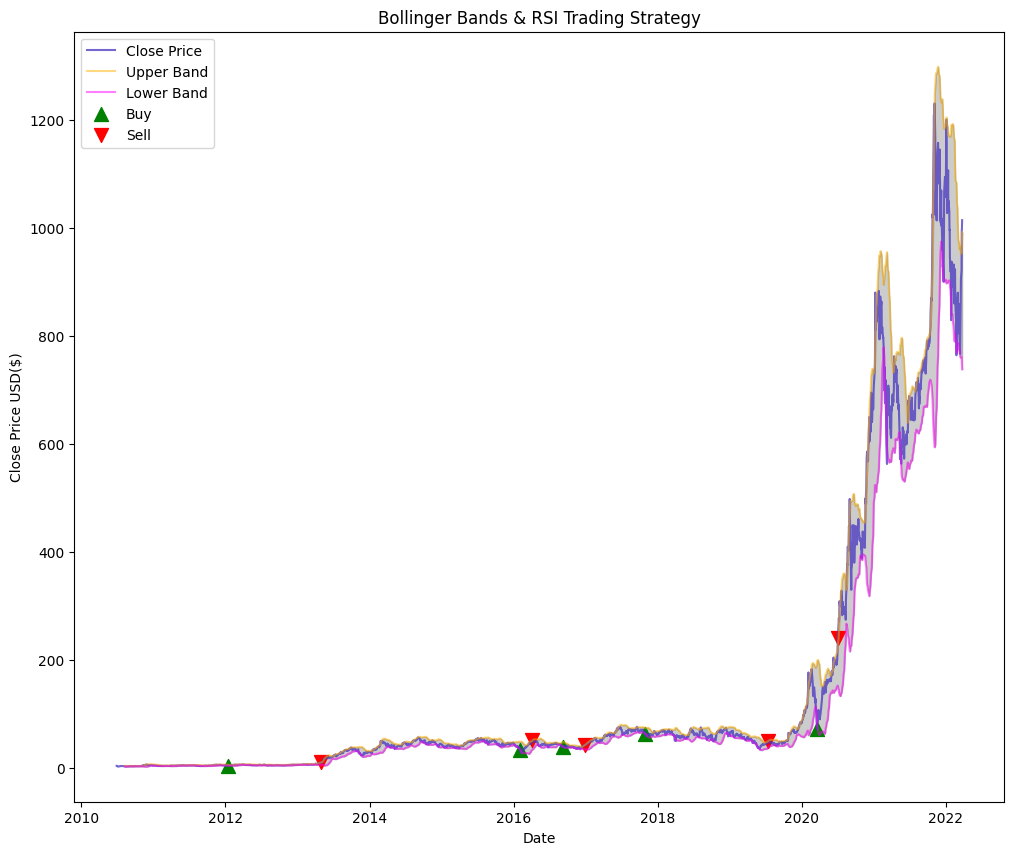

In [20]:
# Visualize the bollinger bands and the strategy 
fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(data2['Close'], label='Close Price', alpha=0.75, color='#4535C1')
ax.plot(data2['UpperBand'], label='Upper Band', alpha=0.5, color='#FFB200')
ax.plot(data2['LowerBand'], label='Lower Band', alpha=0.5, color='magenta')
ax.fill_between(data2.index, data2['UpperBand'], data2['LowerBand'], color='#000000', alpha=0.2)
ax.scatter(data2.index, data2['Buy'], label='Buy', alpha=1, marker='^', s=100, color='green')
ax.scatter(data2.index, data2['Sell'], label='Sell', alpha=1, marker='v', s=100, color='red')

plt.title('Bollinger Bands & RSI Trading Strategy')
plt.legend(loc='upper left')
plt.ylabel('Close Price USD($)')
plt.xlabel('Date')
plt.show()

# Backtesting
`Backtesting` is the process of testing a trading strategy or model using historical data to see how it would have performed in the past. This process helps traders and analysts evaluate the effectiveness of a strategy before applying it in live trading. By this we simulate trades using past data to measure profitability and risk and analyze key performance indicators such as return, risk, drawdown, and win/loss ratio.

In [21]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

Loading BokehJS ...

In [22]:
class SmaCrossStrategy(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2): 
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()

In [23]:
back_test = Backtest(df, SmaCrossStrategy, cash=10_000, commission=.002)
stats = back_test.run()

In [24]:
stats

Start                     2010-06-29 00:00:00
End                       2022-03-24 00:00:00
Duration                   4286 days 00:00:00
Exposure Time [%]                   13.870095
Equity Final [$]                          0.0
Equity Peak [$]                   10564.20432
Return [%]                             -100.0
Buy & Hold Return [%]            21120.594035
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]             1523.195849
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                      -100.0
Avg. Drawdown [%]                      -100.0
Max. Drawdown Duration     4242 days 00:00:00
Avg. Drawdown Duration     4242 days 00:00:00
# Trades                                    1
Win Rate [%]                              0.0
Best Trade [%]                    -100.508025
Worst Trade [%]                   -100.508025
Avg. Trade [%]                    

**Conclusion**:

- *Equity Final* = 0.0: This indicates that the strategy led to a complete loss of the initial capital, leaving no equity at the end of the backtest period.
- *Return* = -100.0: A 100% loss suggests that the strategy was not profitable at all.
- *Volatility (Ann.)* = 1523.195849: This extremely high annualized volatility indicates that the strategy experienced significant fluctuations.
- *Sharp Ratio* = 0.0: Means the strategy was not worth the risk.

In [25]:
back_test.plot()

GridPlot(id='p1325', ...)